<a href="https://colab.research.google.com/github/Horidefelipe/Curso_py/blob/main/Athlete_Olympiada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import altair as alt

In [3]:
import matplotlib.pyplot as plt
 #Libreria para insertar graficos
import numpy as np
#Libreria para insertar vectores

In [4]:
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/games/olimpicos.csv'
df = pd.read_csv(url, sep = ';')
print(df.head())

    ID               Name Sex   Age  Height Weight     Team  NOC    Year  \
0  1.0      Andreea Aanei   F  22.0   170.0  125.0  Romania  ROU  2016.0   
1  2.0  Nstor Abad Sanjun   M  23.0   167.0   64.0    Spain  ESP  2016.0   
2  3.0  Nstor Abad Sanjun   M  23.0   167.0   64.0    Spain  ESP  2016.0   
3  4.0  Nstor Abad Sanjun   M  23.0   167.0   64.0    Spain  ESP  2016.0   
4  5.0  Nstor Abad Sanjun   M  23.0   167.0   64.0    Spain  ESP  2016.0   

   Season            City          Sport  \
0  Summer  Rio de Janeiro  Weightlifting   
1  Summer  Rio de Janeiro     Gymnastics   
2  Summer  Rio de Janeiro     Gymnastics   
3  Summer  Rio de Janeiro     Gymnastics   
4  Summer  Rio de Janeiro     Gymnastics   

                                     Event Medal  
0  Weightlifting Women's Super-Heavyweight   NaN  
1   Gymnastics Men's Individual All-Around   NaN  
2          Gymnastics Men's Floor Exercise   NaN  
3           Gymnastics Men's Parallel Bars   NaN  
4          Gymnastics M

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,5,6,7,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
surveys_df = pd.read_csv(url, sep = ';')

In [7]:
surveys_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1.0,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016.0,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
1,2.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
2,3.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
3,4.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
4,5.0,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016.0,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
surveys_df.dtypes


ID        float64
Name       object
Sex        object
Age       float64
Height    float64
Weight     object
Team       object
NOC        object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [9]:
#Ver nombre de las columnas
surveys_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [10]:
surveys_df.shape
#(Rows,Columns)

(167056, 14)

In [11]:
# contar cantidad de columnas.

df.count()

# Hay algunos valores de tipo "Height" y "Wheight" faltantes.
#Hay muchos valores de tipo "Medal" que no estan. Sera porque no ganaron medalla y los dejaron vacios en vez de poner Nan?

ID        85258
Name      85258
Sex       85258
Age       85255
Height    84547
Weight    84048
Team      85258
NOC       85258
Year      85258
Season    85258
City      85258
Sport     85258
Event     85258
Medal     12138
dtype: int64

In [14]:
#Cantidad de columnas Nulas
print(df.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [13]:
#Borrar Columnas Vacias (Ya las borre)
df = df.dropna()

In [15]:
# Agrupados por edad
df.Age.value_counts()

24.0    1026
25.0     976
26.0     968
27.0     948
23.0     944
22.0     891
28.0     890
29.0     730
21.0     678
30.0     628
31.0     499
20.0     475
32.0     406
19.0     332
33.0     298
34.0     243
18.0     179
35.0     162
36.0     143
17.0     117
16.0      88
37.0      74
38.0      61
39.0      50
40.0      45
41.0      29
15.0      28
42.0      28
43.0      19
44.0      18
46.0      18
45.0      15
47.0      10
52.0       6
49.0       6
51.0       4
50.0       3
48.0       3
54.0       2
58.0       1
53.0       1
56.0       1
55.0       1
61.0       1
Name: Age, dtype: int64

In [ ]:
# Agrupados por Sexo
df.Sex.value_counts()

In [ ]:
surveys_df['NOC'].describe()

In [ ]:

surveys_df['Age'].std()


In [ ]:
surveys_df['Age'].count()

In [ ]:
surveys_df['Age'].mean()


In [ ]:
surveys_df['Age'].max()

In [ ]:
surveys_df['Age'].min()

In [ ]:
grouped_data = surveys_df.groupby('Sex')

In [ ]:
grouped_data.describe()

In [ ]:
grouped_data.mean()

In [ ]:
print(surveys_df[surveys_df.Medal =='Gold'])

In [ ]:
surveys_df.Sport.value_counts()

In [ ]:
import matplotlib.pyplot as plt
my_plot = surveys_df.plot("Age", "Year", kind="scatter")
plt.show() 

In [ ]:
print (surveys_df.groupby(by=['Medal','NOC']).count().groupby(level=[0]).cumsum())

In [ ]:
df_pais_medals = surveys_df[['NOC','Medal']]

In [ ]:
df_pais_medals

In [ ]:
print(df_pais_medals["Medal"].value_counts())

Bronze    4152
Gold      4009
Silver    3977
Name: Medal, dtype: int64


In [ ]:
group=df_pais_medals.groupby(["NOC","Medal"])
medallas = group.size().reset_index(name='total_medal')
print(medallas)

     NOC   Medal  total_medal
0    AFG  Bronze            2
1    ALG  Bronze            4
2    ALG    Gold            2
3    ALG  Silver            4
4    ARG  Bronze           58
..   ...     ...          ...
278  VIE    Gold            1
279  VIE  Silver            3
280  ZIM  Bronze            1
281  ZIM    Gold            2
282  ZIM  Silver            4

[283 rows x 3 columns]


In [ ]:
medallas.NOC.size()

TypeError: ignored

In [ ]:
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/main/medallas_noc.csv'
df1 = pd.read_csv(url, sep = ';')
print(df1.head())

   NOC   Gold  Silver  Bronze  Unnamed: 4  Unnamed: 5
0  ROU   61.0    22.0    56.0         NaN         NaN
1  ESP   28.0   135.0    87.0         NaN         NaN
2  ITA   94.0   145.0   177.0         NaN         NaN
3  AZE    7.0    11.0    25.0         NaN         NaN
4  FRA  132.0   166.0   138.0         NaN         NaN


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.dropna(how='all', axis=1, inplace=True) 
print(df1.head())

   NOC   Gold  Silver  Bronze
0  ROU   61.0    22.0    56.0
1  ESP   28.0   135.0    87.0
2  ITA   94.0   145.0   177.0
3  AZE    7.0    11.0    25.0
4  FRA  132.0   166.0   138.0


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


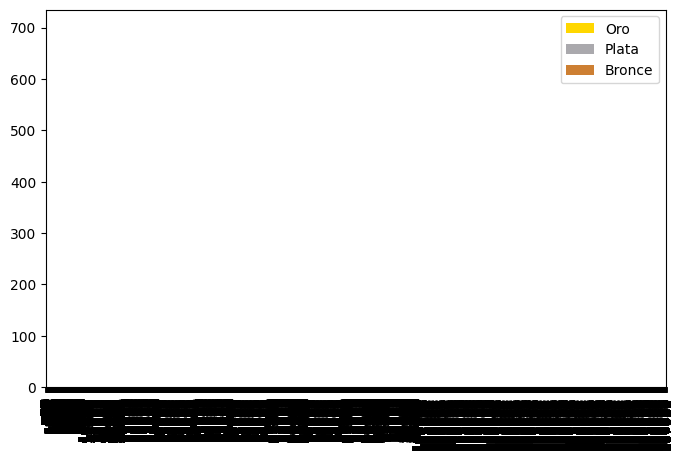

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)  # 800x500 px

bar_width = 0.30
x = np.arange(df1.index.size)

golden_medals = ax.bar(x - bar_width, df1['Gold'],
                       bar_width, label='Oro', color='#ffd700')
silver_medals = ax.bar(x, df1['Silver'],
                       bar_width, label='Plata', color='#aaa9ad')
bronze_medals = ax.bar(x + bar_width, df1['Silver'],
                       bar_width, label='Bronce', color='#cd7f32')

ax.set_xticks(x)
ax.set_xticklabels(df1.index, rotation=90)
ax.legend()

# Etiquetas en barras
ax.bar_label(golden_medals, padding=3)
ax.bar_label(silver_medals, padding=3)
ax.bar_label(bronze_medals, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura
fig